# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import RandomOverSampler
#Data pre processing
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
import category_encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [3]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 


To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking



In [22]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [28]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [105]:
df.shape

(50000, 14)

#### No missing values!

### Numerical and Categorical Features

In [23]:
num_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

In [24]:
num_feature

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration',
 'booking_complete']

In [25]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [26]:
cat_feature

['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']

### Numerical Feature Distribution

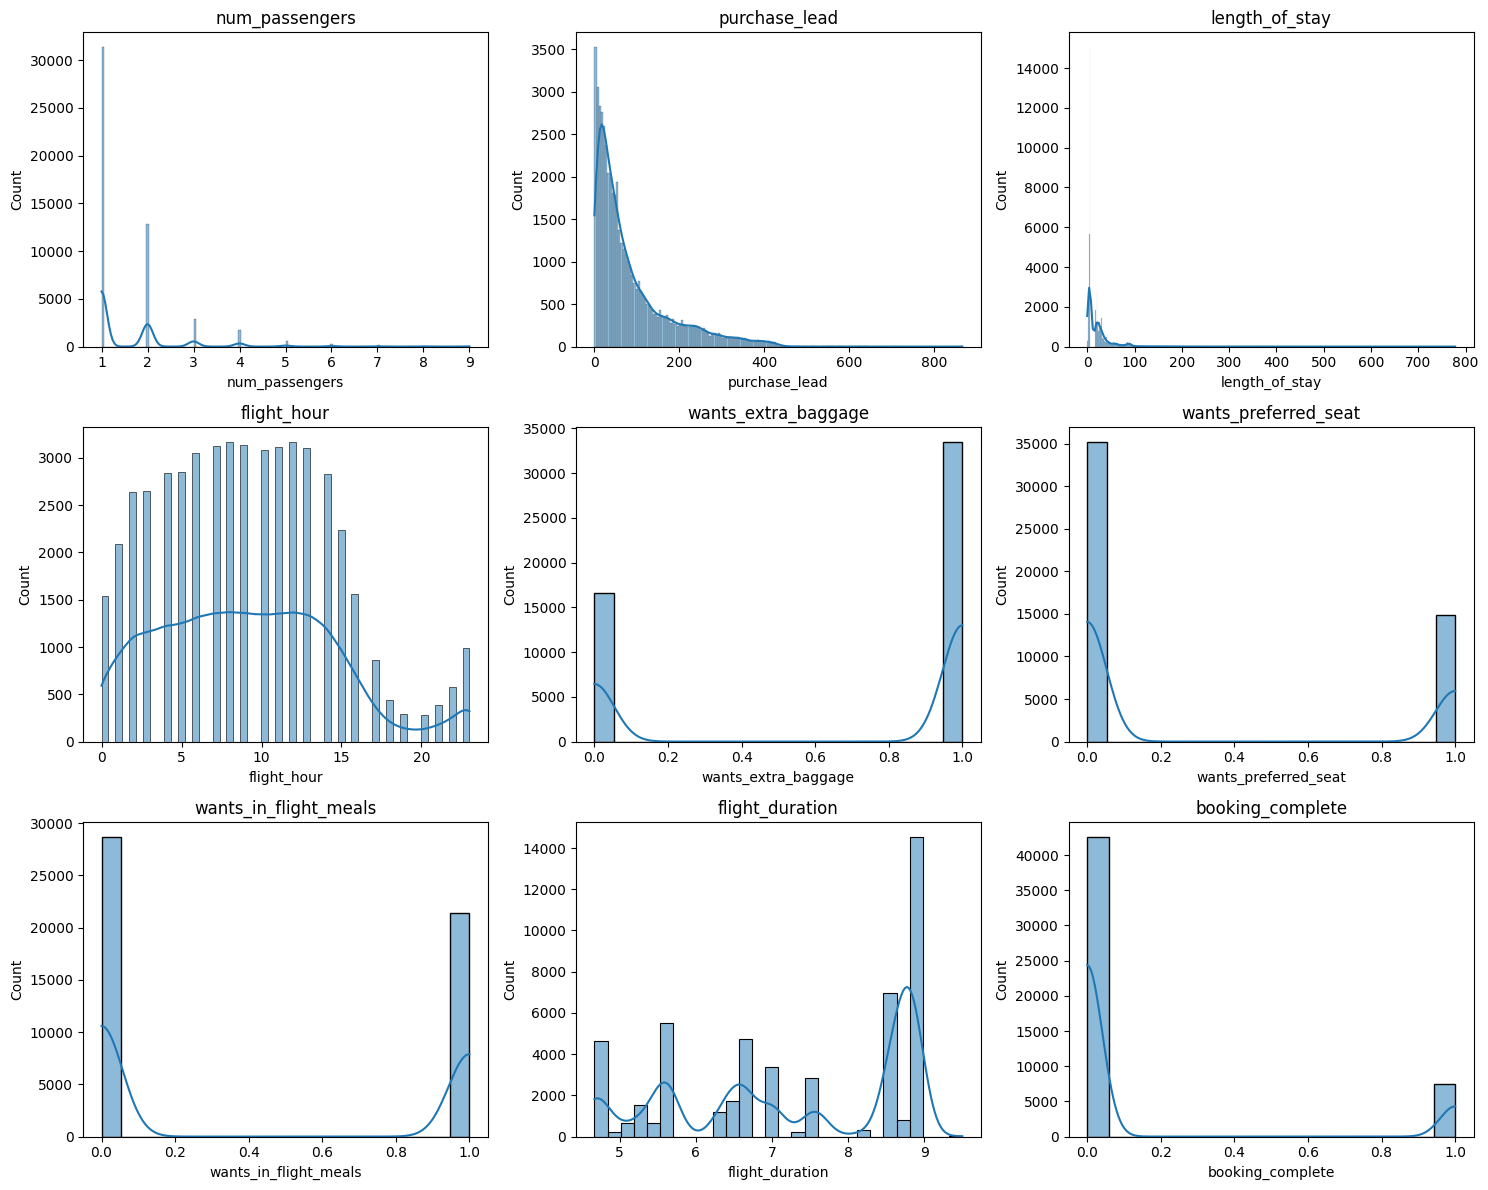

In [41]:
n = len(num_feature)
ncols = 3  # number of columns in the grid
nrows = n // ncols + (n % ncols > 0)

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))

for i, feature in enumerate(num_feature):
    r = i // ncols
    c = i % ncols
    ax = axs[r, c]
    sns.histplot(df[feature], kde=True, ax=ax)  # replace with your preferred plot
    ax.set_title(feature)

plt.tight_layout()
plt.show()

### Insights:
* Solo travllers are more in numbers.
* People have most purchase lead between 0 to 100. The graph exponentially decreases which tells us that majority people book at most 100 days prior to their travel date.
* Length of stay is the highest in single digits which is epetced. Very few people stay out for long periods.
* Many people have chosen 9 hour flights.


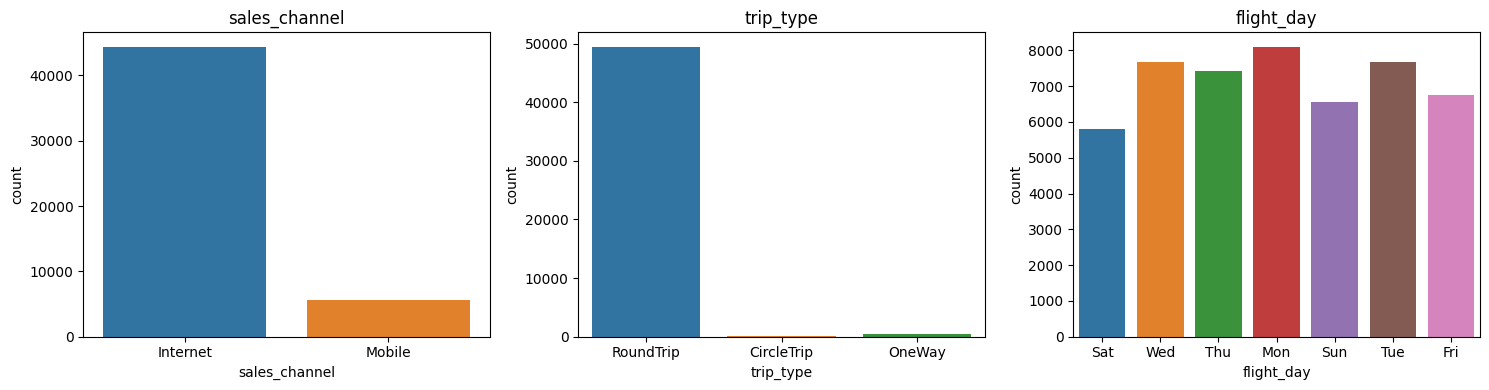

In [62]:
cat_to_plot = ['sales_channel', 'trip_type', 'flight_day']

n = len(cat_to_plot)
ncols = 3  # number of columns in the grid
nrows = 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*4))

for i, feature in enumerate(cat_to_plot):
    sns.countplot(x = feature, data=df, ax=axs[i])  # replace with your preferred plot
    axs[i].set_title(feature)

plt.tight_layout()
plt.show()

### Insights:
* Internet booking was heavily done.
* Majority bookings were of round trip.
* Weekdays saw higher bookings.

[Text(0, 0, 'Incomplete'), Text(0, 1, 'Complete')]

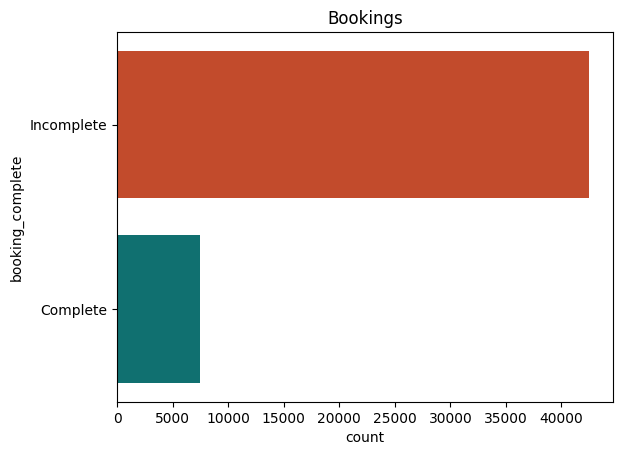

In [67]:
ax = sns.countplot(y=df['booking_complete'],palette=['#db3d13',"#008080"]) 
ax.set_title('Bookings')
ax.set_yticklabels(['Incomplete','Complete'])

### There is class imbalance and many people haven't completed their bookings

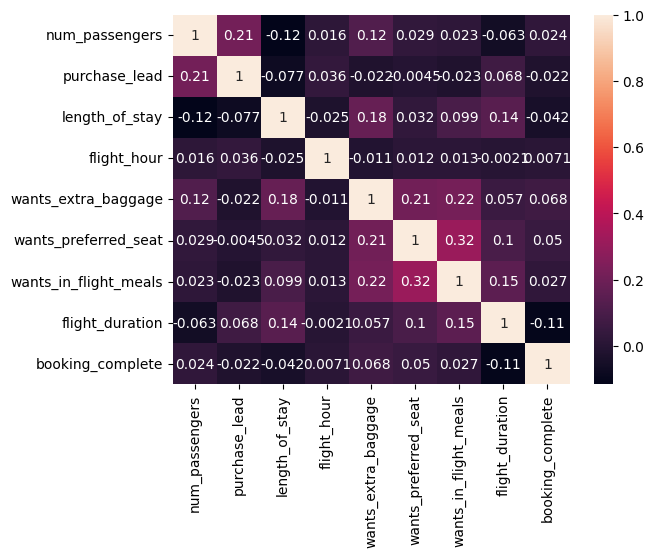

In [82]:
target = 'booking_complete'

# Compute the correlation matrix
corr = df[num_feature].corr()

# Generate a mask for the upper triangle

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True)
plt.show()

### Insight:
* As we can see from correlation matrix, there is not much strong positive or negative trend with any feature with target

In [114]:
df.groupby('route')['num_passengers'].sum().sort_values(ascending=False)

route
AKLKUL    4450
PENTPE    1566
DMKKIX    1428
ICNSIN    1335
MELSGN    1230
          ... 
KOSSYD       1
KOSMEL       1
SGNXIY       1
KNOWUH       1
ICNJED       1
Name: num_passengers, Length: 799, dtype: int64

In [115]:
df.groupby('booking_origin')['num_passengers'].sum().sort_values(ascending=False)

booking_origin
Australia         25831
Malaysia          12025
South Korea        7979
China              7025
Japan              5912
                  ...  
Afghanistan           1
Norfolk Island        1
Pakistan              1
Paraguay              1
Nicaragua             1
Name: num_passengers, Length: 104, dtype: int64

* Auckland to Kuala Lampur has highest passengers.
* Australia has highest booking origin

In [317]:
for feature in cat_feature:
    print(f'Unique values for {feature}:', df[feature].unique())

Unique values for sales_channel: ['Internet' 'Mobile']
Unique values for trip_type: ['RoundTrip' 'CircleTrip' 'OneWay']
Unique values for flight_day: ['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']
Unique values for route: ['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUT

## Encoding

### Route and booking origin has a lot of unique values, we will use target encoding

* We do OHE for sales channel and trip type since they have few unique values and target encoding for route and booking origin since they have a lot of unique values.
* While scaling, we have to scale only continuous features and thus we consider nonbinary ( features with more than 2 unique values)
* After encoding, we pass the output for scaling and binary features are ignored

In [4]:
class Preprocessor:
    def __init__(self, X_train, y_train, X_test, ohe_features, target_features):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        
        self.ohe_features = ohe_features
        self.target_features = target_features
       

    def preprocess_ohe_target(self):
        
        self.numerical_features = [feature for feature in self.X_train.columns if self.X_train[feature].dtype != 'O' ]
        
        ohe = OneHotEncoder(drop='first')
        target = TargetEncoder()
        
        preprocessor_encoding = ColumnTransformer(
            transformers=[
                ('ohe', ohe, self.ohe_features),
                ('target', target, self.target_features),
                ('passthrough', 'passthrough', self.numerical_features)
            ])
        pipeline_encoding = Pipeline(steps=[('preprocessor', preprocessor_encoding)])
        
        self.X_train_transformed = pipeline_encoding.fit_transform(self.X_train, self.y_train)
        self.X_test_transformed = pipeline_encoding.transform(self.X_test)
        
        ohe_feature_names = pipeline_encoding.named_steps['preprocessor'].named_transformers_['ohe'].get_feature_names_out(input_features=self.ohe_features)
        encoded_feature_names = list(ohe_feature_names) + self.target_features + self.numerical_features
        
        self.X_train_transformed = pd.DataFrame(self.X_train_transformed, columns=encoded_feature_names, index=self.X_train.index)
        self.X_test_transformed = pd.DataFrame(self.X_test_transformed, columns=encoded_feature_names, index=self.X_test.index)
        
        return self.X_train_transformed, self.X_test_transformed

    def preprocess_scaler(self):
        
        self.binary_features = [feature for feature in self.X_train_transformed.columns if self.X_train_transformed[feature].nunique() < 3 ]
        self.non_binary_features = [feature for feature in self.X_train_transformed.columns if feature not in self.binary_features ]
        
        scaler = StandardScaler()
        preprocessor_scaling = ColumnTransformer(
            transformers=[
                ('scaler', scaler, self.non_binary_features),
                ('passthrough', 'passthrough', self.binary_features)
            ])
        
        pipeline_scaling = Pipeline(steps=[('preprocessor', preprocessor_scaling)])
        
        X_train_transformed_scaled = pipeline_scaling.fit_transform(self.X_train_transformed)
        X_test_transformed_scaled = pipeline_scaling.transform(self.X_test_transformed)
        
        transformed_feature_names = self.non_binary_features + self.binary_features
        
        X_train_transformed_scaled = pd.DataFrame(X_train_transformed_scaled, columns=transformed_feature_names, index=self.X_train_transformed.index)
        X_test_transformed_scaled = pd.DataFrame(X_test_transformed_scaled, columns=transformed_feature_names, index=self.X_test_transformed.index)
       
        return X_train_transformed_scaled, X_test_transformed_scaled

    def preprocess_data(self):
        self.X_train_transformed, self.X_test_transformed = self.preprocess_ohe_target()
        X_train_transformed_scaled, X_test_transformed_scaled = self.preprocess_scaler()
        return X_train_transformed_scaled, X_test_transformed_scaled

## 1. Data processing without removing outliers, without additional columns, without correcting target imbalance and without adjusting distribution

In [308]:
df1 = df.copy()

In [309]:
df1.head(4)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0


In [310]:
# Define a manual mapping for the days of the week
day_mapping = {'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thu': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}

# Apply the mapping to the flight_day column
df1['flight_day'] = df1['flight_day'].map(day_mapping)


In [593]:
X = df1.drop('booking_complete',axis=1)
y = df1['booking_complete']

In [594]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [595]:
X_train['trip_type'].value_counts()

RoundTrip     39586
OneWay          312
CircleTrip      102
Name: trip_type, dtype: int64

In [319]:
X_train.shape,X_test.shape

((40000, 13), (10000, 13))

In [436]:

ohe_features = ['sales_channel', 'trip_type']
target_features = ['route', 'booking_origin']

preprocessor = Preprocessor(X_train, y_train, X_test, ohe_features, target_features)
X_train_transformed_scaled, X_test_transformed_scaled = preprocessor.preprocess_data()

###  This is encoded,scaled on original dataset

In [437]:
X_train.shape,X_train_transformed_scaled.shape

((40000, 13), (40000, 14))

In [438]:
X_train_transformed_scaled.head(3)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
39087,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,1.0,0.0,1.0,0.0,0.0,1.0
30893,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,0.0,0.0,1.0,1.0,0.0,0.0
45278,-0.609062,-0.461472,0.401834,1.275615,-0.508949,-0.751808,-0.408547,-0.436058,0.0,0.0,1.0,1.0,0.0,0.0


In [439]:
X_test_transformed_scaled.head(3)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
33553,0.677176,-0.212165,0.401834,-0.418725,-0.568591,1.096647,0.092492,-0.182402,0.0,0.0,1.0,1.0,1.0,0.0
9427,-0.785689,0.754554,-0.582751,-0.429799,1.846927,0.911802,-1.410626,1.039153,1.0,0.0,1.0,1.0,1.0,0.0
199,0.605063,-0.000952,-0.582751,0.522575,-0.091452,-0.012426,-1.410626,1.039153,0.0,0.0,1.0,1.0,0.0,0.0


In [440]:
df_train_enc_scal = pd.concat([X_train_transformed_scaled,y_train],axis=1)
df_test_enc_scal = pd.concat([X_test_transformed_scaled,y_test],axis=1)

In [441]:
df_train_enc_scal.to_csv('df_train_enc_scal_og.csv',index=False)

In [442]:
df_test_enc_scal.to_csv('df_test_enc_scal_og.csv',index=False)

# 2. Handling imbalance using SMOTE
   * Test data will remain same as before

In [444]:
df1['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

* As you can see , highly imbalanced

In [445]:
sm = SMOTE(random_state=42)
X_train_scaled_smote, y_train_scaled_smote = sm.fit_resample(X_train_transformed_scaled, y_train)

__This is smote on og encoded scaled dataset, test data will be sameas before__

In [446]:
df_train_enc_scal_smote = pd.concat([X_train_scaled_smote,y_train_scaled_smote],axis=1)
df_train_enc_scal_smote.to_csv("df_train_enc_scal_smote.csv",index=False)

# 3. Adding a few new columns and then SMOTE

In [448]:
df2 = df1.copy()

In [449]:
df2.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0


In [450]:
# Assuming df is your DataFrame and 'flight_day' is the day of the week (0=Monday, 6=Sunday)
df2['is_weekday'] = df2['flight_day'].apply(lambda x: 1 if x < 5 else 0)
df2['is_weekend'] = df2['flight_day'].apply(lambda x: 1 if x >= 5 else 0)

# Summing up additional facilities
df2['total_extras'] = df2['wants_extra_baggage'] + df2['wants_preferred_seat'] + df2['wants_in_flight_meals']

In [451]:
df2.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekday,is_weekend,total_extras
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,2


In [457]:
X1 = df2.drop('booking_complete',axis=1)
y1 = df2['booking_complete']

In [461]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [462]:

ohe_features = ['sales_channel', 'trip_type']
target_features = ['route', 'booking_origin']

preprocessor = Preprocessor(X_train_1, y_train_1, X_test_1, ohe_features, target_features)
X_train_transformed_scaled_1, X_test_transformed_scaled_1 = preprocessor.preprocess_data()

In [588]:
X_train_transformed_scaled_1.head(2)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,is_weekday,is_weekend
39087,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,-0.388061,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
30893,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [580]:
X_test_transformed_scaled_1.head(2)

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,is_weekday,is_weekend
33553,0.677176,-0.212165,0.401834,-0.418725,-0.568591,1.096647,0.092492,-0.182402,0.608756,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
9427,-0.785689,0.754554,-0.582751,-0.429799,1.846927,0.911802,-1.410626,1.039153,0.608756,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


In [581]:
X_train_transformed_scaled_1.shape, X_test_transformed_scaled_1.shape

((40000, 17), (10000, 17))

* ### Saving new cols without smote

In [554]:
df_train_newcols = pd.concat([X_train_transformed_scaled_1,y_train_1],axis=1)
df_train_newcols.to_csv("df_train_newcols.csv",index=False)

In [589]:
df_train_newcols['sales_channel_Mobile'].value_counts()

0.0    35430
1.0     4570
Name: sales_channel_Mobile, dtype: int64

In [556]:
df_test_newcols = pd.concat([X_test_transformed_scaled_1,y_test_1],axis=1)
df_test_newcols.to_csv("df_test_newcols.csv",index=False)

* ### Saving newly cols and smote csv files

In [469]:
sm1 = SMOTE(random_state=42)
X_train_scaled_smote_1, y_train_scaled_smote_1 = sm1.fit_resample(X_train_transformed_scaled_1, y_train_1)

In [470]:
df_train_smote_newcols = pd.concat([X_train_scaled_smote_1,y_train_scaled_smote_1],axis=1)
df_train_smote_newcols.to_csv("df_train_smote_newcols.csv",index=False)

In [473]:
df_test_processed_newcols = pd.concat([X_test_transformed_scaled_1,y_test_1],axis=1)
df_test_processed_newcols.to_csv("df_test_processed_newcols.csv",index=False)

# 4. Lets try adjusting distributions and removing outliers

In [480]:
df3 = df2.copy()

In [500]:
continuous_dist_cols = []

for b,c in X_train_transformed_scaled_1.nunique().items():
    if c >2:
        continuous_dist_cols.append(b)

In [501]:
continuous_dist_cols

['route',
 'booking_origin',
 'num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'flight_duration',
 'total_extras']

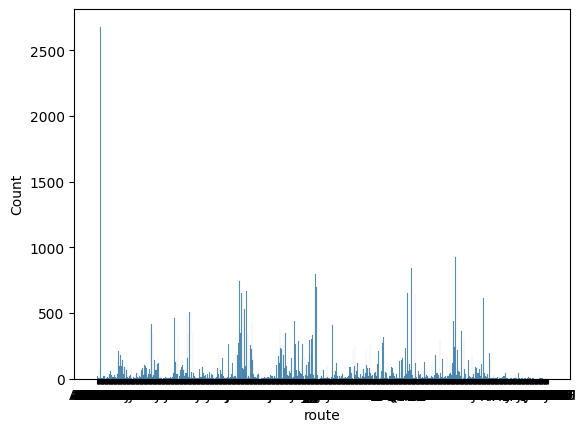

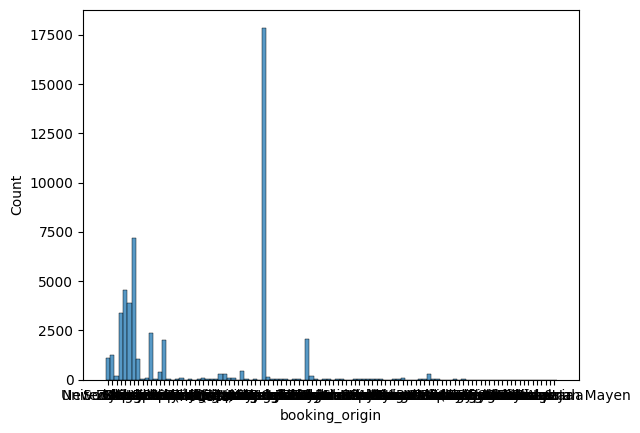

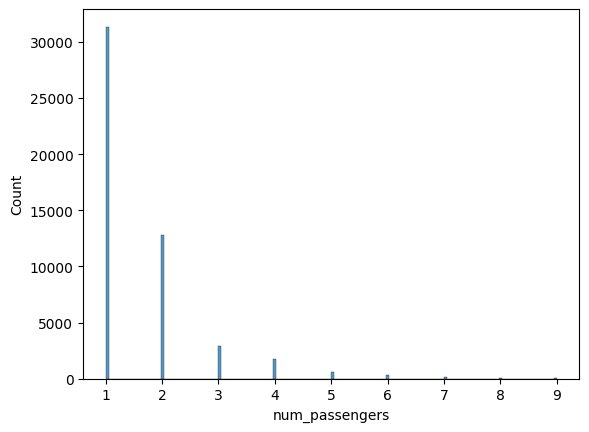

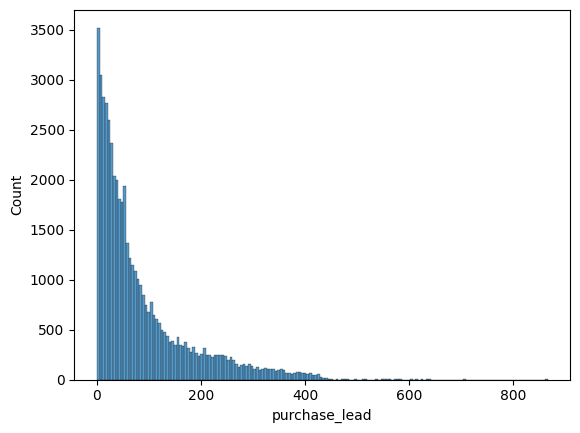

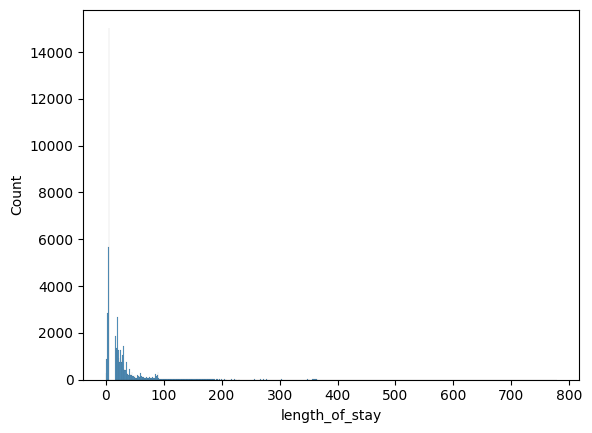

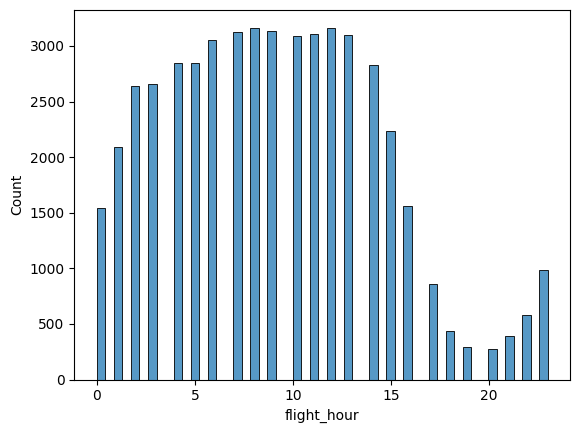

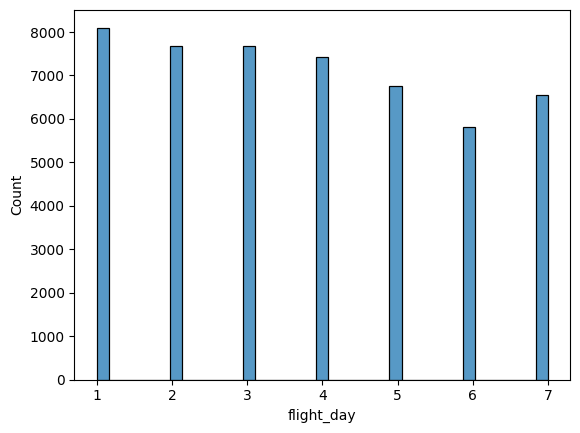

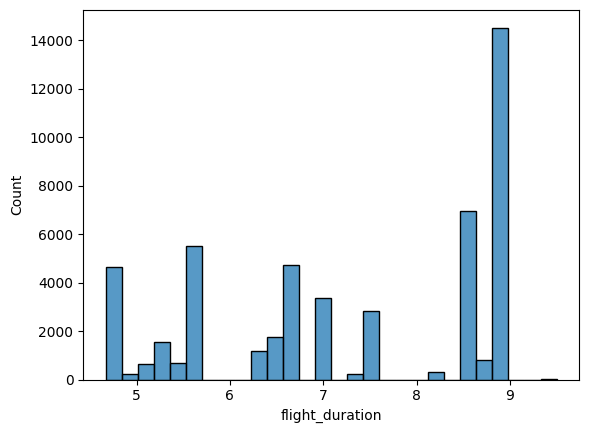

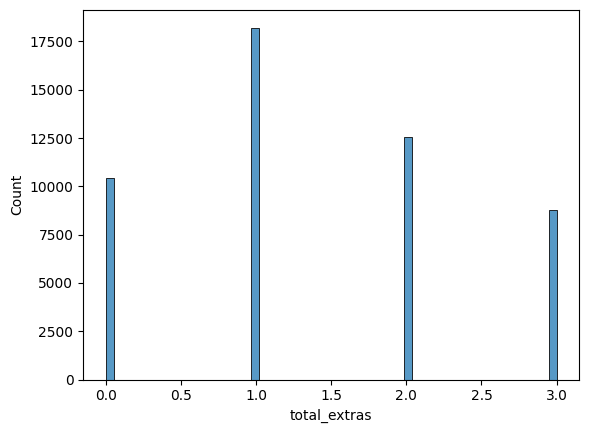

In [504]:
for i in continuous_dist_cols:
    sns.histplot(df3[i])
    plt.show()

* We can try converting purchase leade and length of stay to normal dist

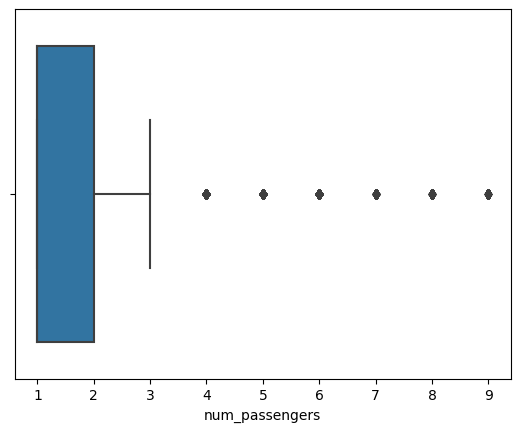

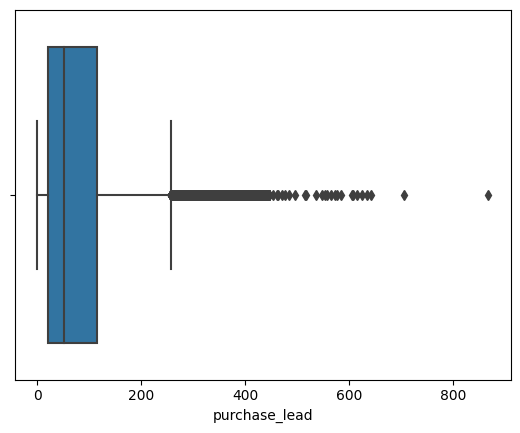

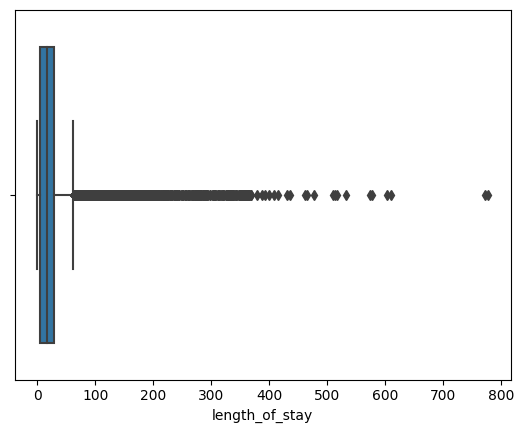

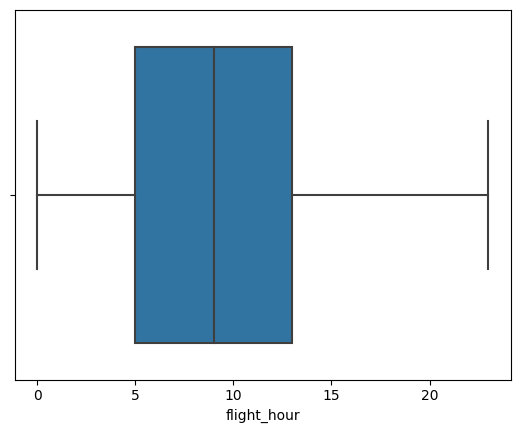

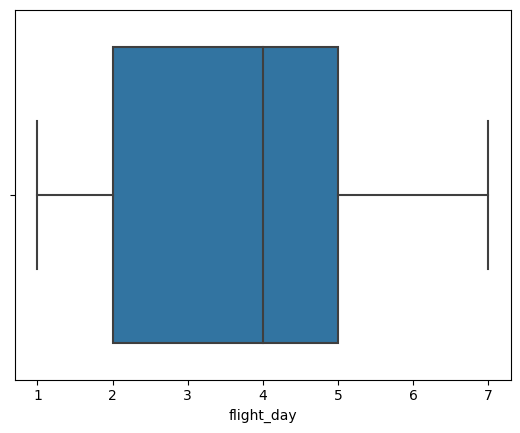

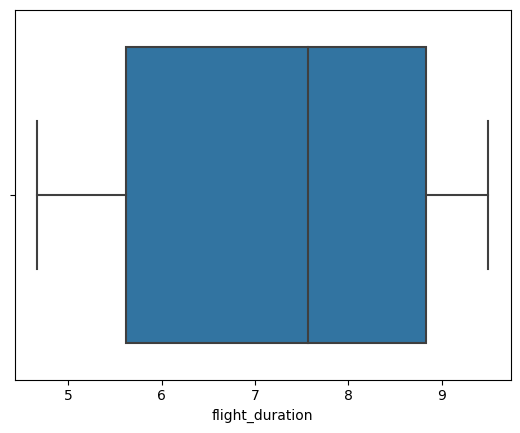

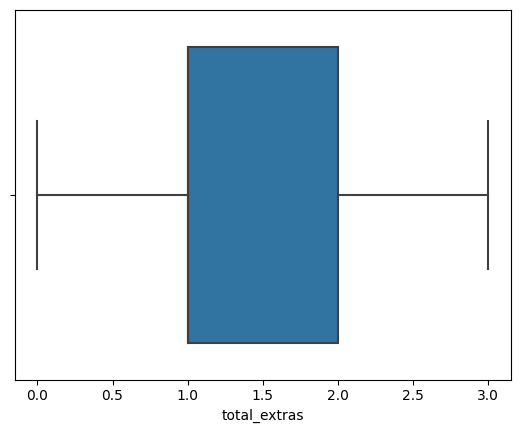

In [507]:
for i in continuous_dist_cols:
    if df3[i].dtype !='O':
        sns.boxplot(x=df3[i])
        plt.show()

* We will remove outliers from 'purchase_lead', 'length_of_stay'

In [515]:
cols_to_transform = ['purchase_lead', 'length_of_stay']

for col in cols_to_transform:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1

    # Only keep rows in the DataFrame that are within the IQR
    df3 = df3[~((df3[col] < (Q1 - 1.5 * IQR)) | (df3[col] > (Q3 + 1.5 * IQR)))]

    # Adding 1 to handle zero values in the column
    df3[col] = df3[col] + 1
    df3[col], _ = stats.boxcox(df3[col])

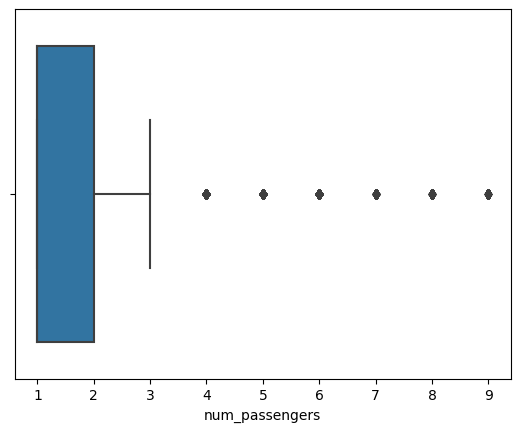

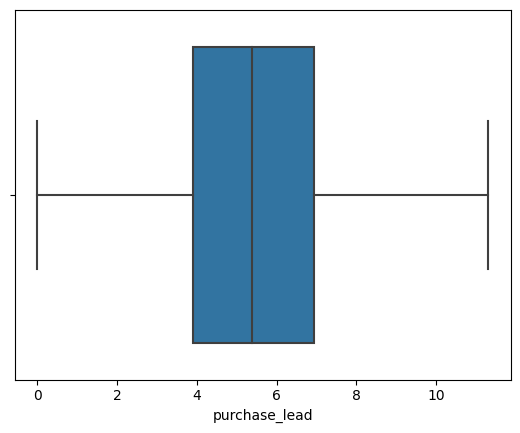

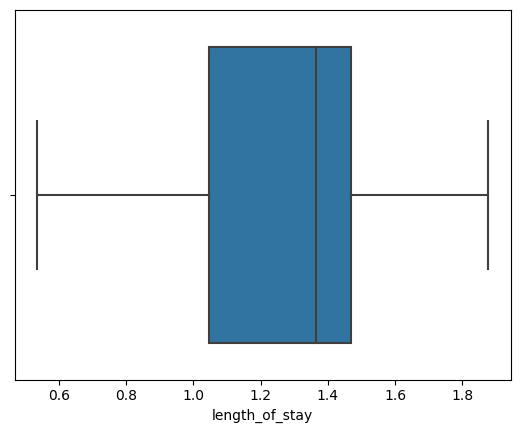

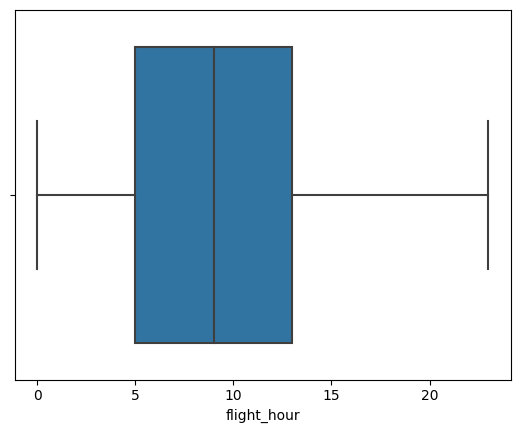

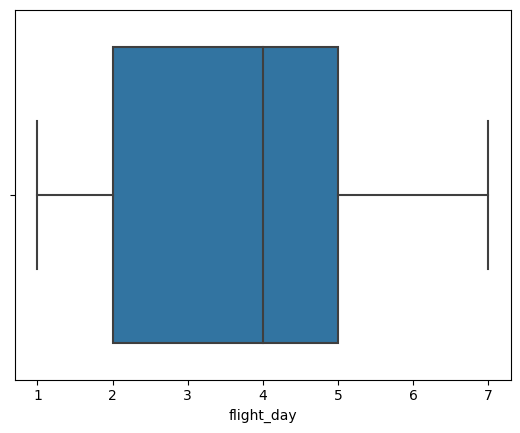

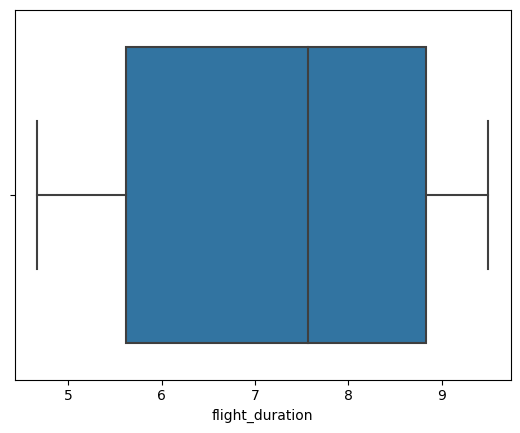

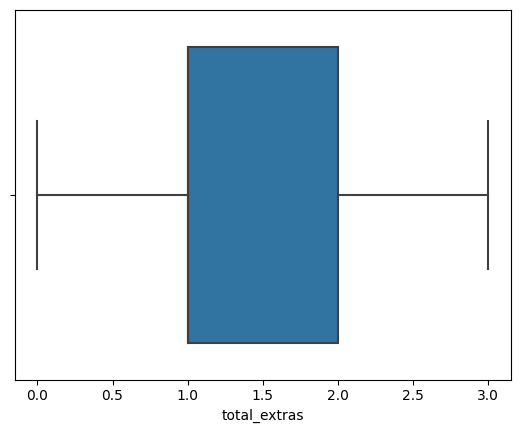

In [516]:
for i in continuous_dist_cols:
    if df3[i].dtype !='O':
        sns.boxplot(x=df3[i])
        plt.show()

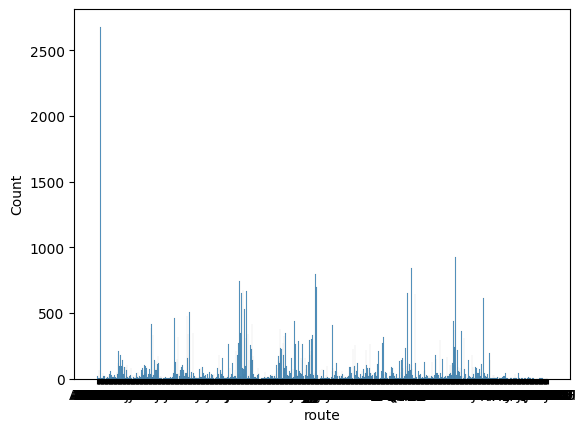

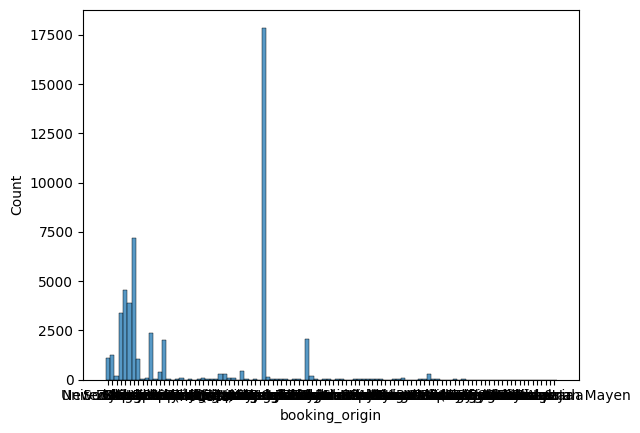

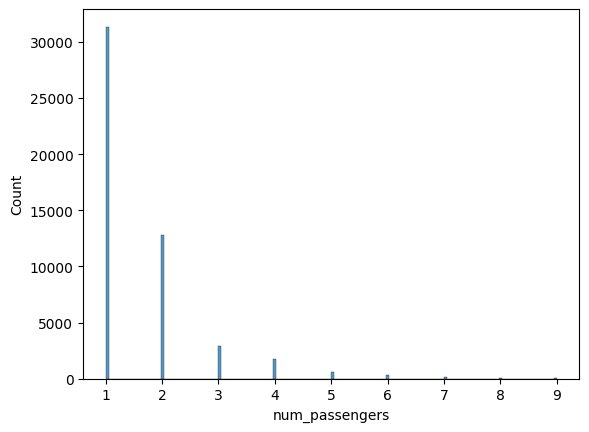

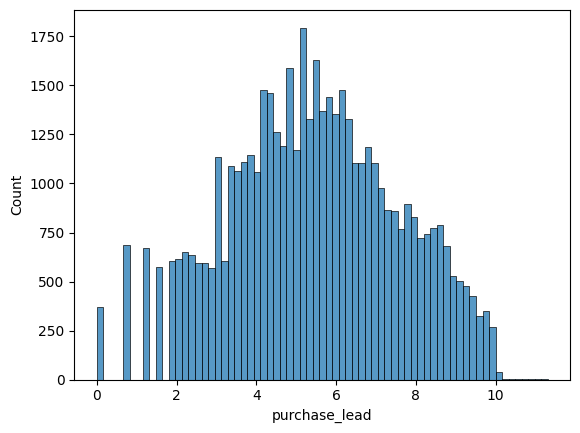

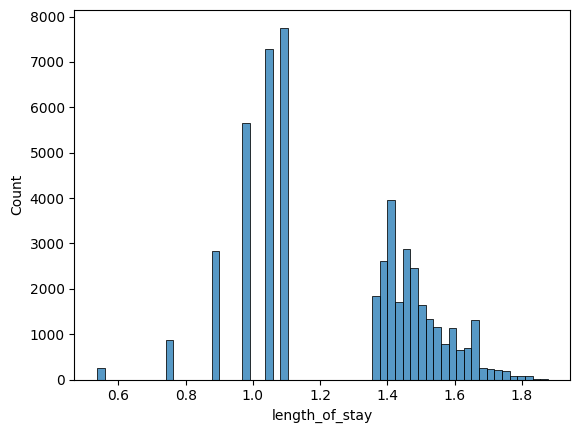

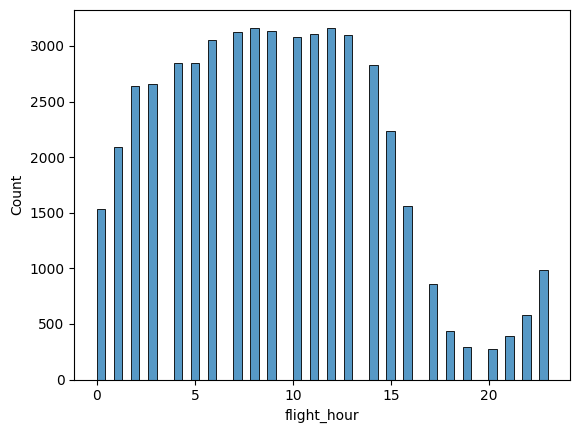

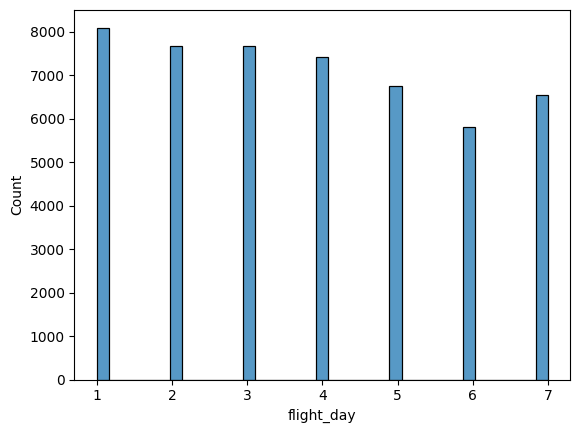

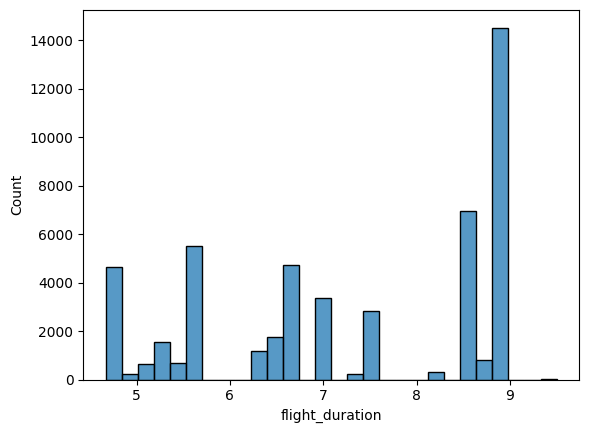

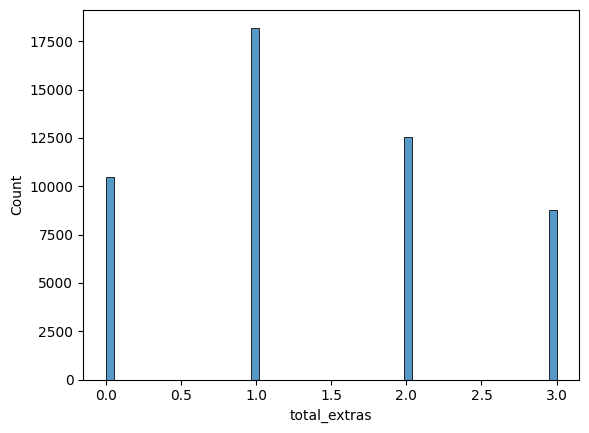

In [517]:
for i in continuous_dist_cols:
    sns.histplot(df3[i])
    plt.show()

### As we can see those two columns have been devoid of outliers and have been normally distributed

In [522]:
df3.shape



(49990, 17)

In [524]:
df3.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'is_weekday', 'is_weekend', 'total_extras'],
      dtype='object')

In [526]:
X2 = df3.drop('booking_complete',axis=1)
y2 = df3['booking_complete']


In [527]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [528]:

ohe_features = ['sales_channel', 'trip_type']
target_features = ['route', 'booking_origin']

preprocessor = Preprocessor(X_train_2, y_train_2, X_test_2, ohe_features, target_features)
X_train_transformed_scaled_2, X_test_transformed_scaled_2 = preprocessor.preprocess_data()

In [529]:
X_train_transformed_scaled_2.shape, X_test_transformed_scaled_2.shape

((39992, 17), (9998, 17))

In [530]:
sm1 = SMOTE(random_state=42)
X_train_scaled_smote_2, y_train_scaled_smote_2 = sm1.fit_resample(X_train_transformed_scaled_2, y_train_2)

In [531]:
df_train_smote_newcols_outlier = pd.concat([X_train_scaled_smote_2,y_train_scaled_smote_2],axis=1)
df_train_smote_newcols_outlier.to_csv("df_train_smote_newcols_outlier.csv",index=False)

In [532]:
df_test_processed_newcols_outlier = pd.concat([X_test_transformed_scaled_2,y_test_2],axis=1)
df_test_processed_newcols_outlier.to_csv("df_test_processed_newcols_outlier.csv",index=False)

# 5. Adding interaction columns

In [534]:
df4 = df2.copy()

In [535]:
df4.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekday,is_weekend,total_extras
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,0,1,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,0,1,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,0,2
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,0,1,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,0,2


In [536]:
df4['interaction'] = df4['length_of_stay'] * df4['flight_duration']

In [537]:
df4.drop(['flight_day','wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'is_weekday'],axis=1,inplace=True)

In [539]:
X3 = df4.drop('booking_complete',axis=1)
y3 = df4['booking_complete']


In [540]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [549]:

ohe_features = ['sales_channel', 'trip_type']
target_features = ['route', 'booking_origin']

preprocessor = Preprocessor(X_train_3, y_train_3, X_test_3, ohe_features, target_features)
X_train_transformed_scaled_3, X_test_transformed_scaled_3 = preprocessor.preprocess_data()

In [550]:
X_train_transformed_scaled_3.shape, X_test_transformed_scaled_3.shape

((40000, 13), (10000, 13))

In [551]:
sm2 = SMOTE(random_state=42)
X_train_scaled_smote_3, y_train_scaled_smote_3 = sm1.fit_resample(X_train_transformed_scaled_3, y_train_3)

In [552]:
df_train_interaction = pd.concat([X_train_scaled_smote_3,y_train_scaled_smote_3],axis=1)
df_train_interaction .to_csv("df_train_interaction .csv",index=False)

In [553]:
df_test_interaction = pd.concat([X_test_transformed_scaled_3,y_test_3],axis=1)
df_test_interaction.to_csv("df_test_interaction.csv",index=False)

# 6. Trying mutual info to select top 6 important features of new cols dataset

In [81]:
df_train = pd.read_csv('Newcols_withoutsmote/df_train_newcols.csv')
df_test = pd.read_csv('Newcols_withoutsmote/df_test_newcols.csv')

In [82]:
df_train.head()

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,is_weekday,is_weekend,booking_complete
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,-0.388061,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
2,-0.609062,-0.461472,0.401834,1.275615,-0.508949,-0.751808,-0.408547,-0.436058,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
3,0.468009,-0.921484,-0.582751,-0.064353,-0.061631,0.357265,1.094570,0.872274,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
4,-0.418481,-0.461472,-0.582751,0.223574,-0.091452,-0.566963,1.595610,-0.436058,0.608756,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0


In [52]:
df_test.head()

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,is_weekday,is_weekend,booking_complete
0,0.677176,-0.212165,0.401834,-0.418725,-0.568591,1.096647,0.092492,-0.182402,0.608756,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0
1,-0.785689,0.754554,-0.582751,-0.429799,1.846927,0.911802,-1.410626,1.039153,0.608756,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0
2,0.605063,-0.000952,-0.582751,0.522575,-0.091452,-0.012426,-1.410626,1.039153,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
3,-0.220747,-0.212165,-0.582751,-0.296910,-0.151094,2.575411,-1.410626,0.198083,1.605574,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0
4,-0.358147,0.495376,0.401834,-0.385503,-0.538770,-0.751808,0.092492,-0.436058,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0


In [53]:
df_train.shape , df_test.shape

((40000, 18), (10000, 18))

In [83]:
df_mi = pd.concat([df_train,df_test])
df_mi.shape

(50000, 18)

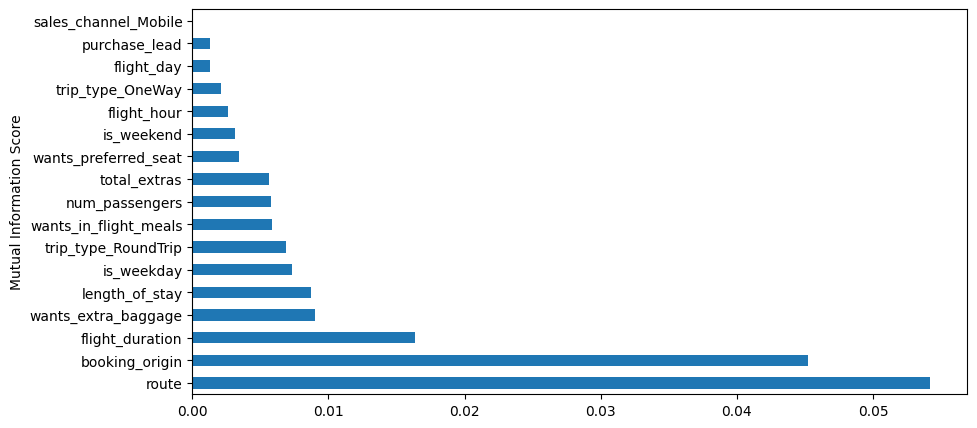

In [84]:


# Assuming df is your DataFrame and 'booking_complete' is your target feature
X = df_mi.drop('booking_complete', axis=1)
y = df_mi['booking_complete']

# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X, y)

# Create a Series for easy plotting
mi_series = pd.Series(mutual_info, index=X.columns)

# Sort by value for easier plotting
mi_series.sort_values(ascending=False, inplace=True)

# Plot the ordered mutual information values
plt.figure(figsize=(10,5))
mi_series.plot(kind='barh')
plt.ylabel('Mutual Information Score')
plt.show()

### We can see that route,booking_origin,flight_duration,round_trip,length of stay,extra baggage and weekday are top 7 features

In [85]:
mi_series.index

Index(['route', 'booking_origin', 'flight_duration', 'wants_extra_baggage',
       'length_of_stay', 'is_weekday', 'trip_type_RoundTrip',
       'wants_in_flight_meals', 'num_passengers', 'total_extras',
       'wants_preferred_seat', 'is_weekend', 'flight_hour', 'trip_type_OneWay',
       'flight_day', 'purchase_lead', 'sales_channel_Mobile'],
      dtype='object')

In [86]:
df_mi = df_mi[['route', 'booking_origin', 'flight_duration', 'trip_type_RoundTrip',
       'length_of_stay', 'wants_extra_baggage','is_weekday','booking_complete']]

In [87]:
df_mi.shape

(50000, 8)

In [88]:
df_train_mi = df_mi[:40000]
df_test_mi = df_mi[40000:]

In [89]:
X_train_mi_newcols,y_train_mi_newcols = df_train_mi.drop('booking_complete',axis=1) , df_train_mi['booking_complete']
X_test_mi_newcols,y_test_mi_newcols = df_test_mi.drop('booking_complete',axis=1) , df_test_mi['booking_complete']

* __Saving before applying smote__

In [91]:
X_train_mi_newcols.to_csv('dataset_mutualinfo_smote_newcols/X_train_mi_newcols.csv',index=False)
y_train_mi_newcols.to_csv('dataset_mutualinfo_smote_newcols/y_train_mi_newcols.csv',index=False)
X_test_mi_newcols.to_csv('dataset_mutualinfo_smote_newcols/X_test_mi_newcols.csv',index=False)
y_test_mi_newcols.to_csv('dataset_mutualinfo_smote_newcols/y_test_mi_newcols.csv',index=False)

* __Now applying smote__

In [92]:
sm3 = SMOTE(random_state=42)
X_train_smote_mi_newcols, y_train_smote_mi_newcols = sm3.fit_resample(X_train_mi_newcols, y_train_mi_newcols)

In [93]:
X_train_smote_mi_newcols.to_csv('dataset_mutualinfo_smote_newcols/X_train_smote_mi_newcols.csv',index=False)
y_train_smote_mi_newcols.to_csv('dataset_mutualinfo_smote_newcols/y_train_smote_mi_newcols.csv',index=False)


# 7. MI with OG dataset

In [3]:
df_train_og_mi = pd.read_csv('og data/df_train_enc_scal_og.csv')
df_test_og_mi =  pd.read_csv('og data/df_test_enc_scal_og.csv')

In [4]:
df_train_og_mi.shape

(40000, 15)

In [5]:
df_mi_og = pd.concat([df_train_og_mi,df_test_og_mi])
df_mi_og.shape

(50000, 15)

In [6]:
df_mi_og.columns

Index(['route', 'booking_origin', 'num_passengers', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'flight_duration',
       'sales_channel_Mobile', 'trip_type_OneWay', 'trip_type_RoundTrip',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'booking_complete'],
      dtype='object')

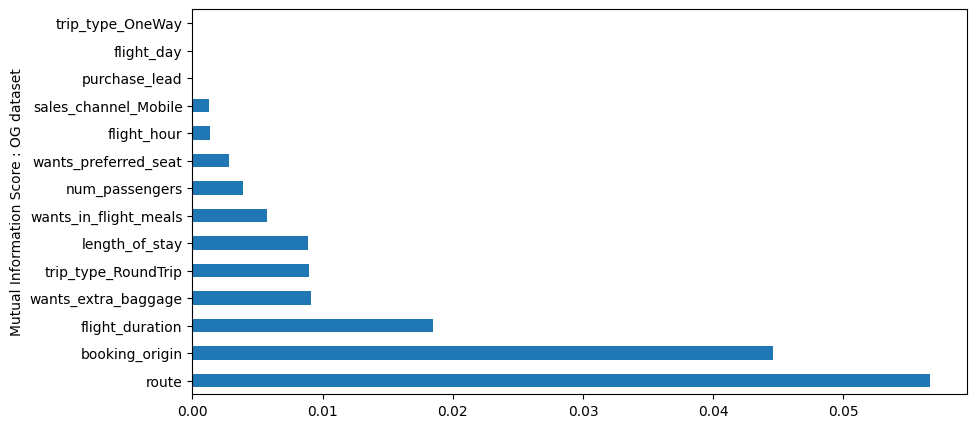

In [10]:
# Assuming df is your DataFrame and 'booking_complete' is your target feature
X = df_mi_og.drop('booking_complete', axis=1)
y = df_mi_og['booking_complete']

# Calculate Mutual Information between each feature and the target
mutual_info_og = mutual_info_classif(X, y)

# Create a Series for easy plotting
mi_series_og = pd.Series(mutual_info_og, index=X.columns)

# Sort by value for easier plotting
mi_series_og.sort_values(ascending=False, inplace=True)

# Plot the ordered mutual information values
plt.figure(figsize=(10,5))
mi_series_og.plot(kind='barh')
plt.ylabel('Mutual Information Score : OG dataset')
plt.show()

In [12]:
df_mi_og = df_mi_og[['route', 'booking_origin', 'flight_duration', 'trip_type_RoundTrip',
       'length_of_stay', 'wants_extra_baggage', 'wants_in_flight_meals','booking_complete']]

In [16]:
df_train_og_mi = df_mi_og[:40000]
df_test_og_mi = df_mi_og[40000:]

In [19]:
X_train_mi_og,y_train_mi_og = df_train_og_mi.drop('booking_complete',axis=1) , df_train_og_mi['booking_complete']
X_test_mi_og,y_test_mi_og = df_test_og_mi.drop('booking_complete',axis=1) , df_test_og_mi['booking_complete']

In [20]:
X_train_mi_og.to_csv('OG_MI/X_train_mi_og.csv',index=False)
y_train_mi_og.to_csv('OG_MI/y_train_mi_og.csv',index=False)
X_test_mi_og.to_csv('OG_MI/X_test_mi_og.csv',index=False)
y_test_mi_og.to_csv('OG_MI/y_test_mi_og.csv',index=False)

* ### __Now applying smote to og mi data, tests data would be same as above__

In [21]:
sm4 = SMOTE(random_state=42)
X_train_smote_mi_og, y_train_smote_mi_og = sm4.fit_resample(X_train_mi_og, y_train_mi_og)

In [22]:
X_train_smote_mi_og.to_csv('OG_MI_SMOTE/X_train_smote_mi_og.csv',index=False)
y_train_smote_mi_og.to_csv('OG_MI_SMOTE/y_train_smote_mi_og.csv',index=False)
X_test_mi_og.to_csv('OG_MI_SMOTE/X_test_mi_og.csv',index=False)
y_test_mi_og.to_csv('OG_MI_SMOTE/y_test_mi_og.csv',index=False)

## Insight:
* Considering top 7 from both MI datasets ( og and new cols), the og has want_meals col and newcols has is_weekday col, rest is same

# 8. Doing random oversampling instead of smote

* ## __With new cols__

In [600]:
df_train_rs = pd.read_csv('Newcols_withoutsmote/df_train_newcols.csv')

In [627]:
df_test_rs = pd.read_csv('Newcols_withoutsmote/df_test_newcols.csv')

In [604]:
df_train_rs.shape,df_test_rs.shape

((40000, 18), (10000, 18))

In [609]:
df_train_rs

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,total_extras,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,is_weekday,is_weekend,booking_complete
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,-0.388061,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
2,-0.609062,-0.461472,0.401834,1.275615,-0.508949,-0.751808,-0.408547,-0.436058,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0
3,0.468009,-0.921484,-0.582751,-0.064353,-0.061631,0.357265,1.094570,0.872274,-0.388061,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0
4,-0.418481,-0.461472,-0.582751,0.223574,-0.091452,-0.566963,1.595610,-0.436058,0.608756,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.474087,1.260352,-0.582751,-0.717726,2.025854,0.357265,0.593531,0.872274,0.608756,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0
39996,0.285321,-0.369185,-0.582751,-0.219391,-0.508949,1.651184,-0.408547,0.097955,1.605574,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0
39997,-0.218347,0.754554,0.401834,0.245722,-0.538770,-0.566963,-0.909587,0.198083,-0.388061,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1
39998,0.605063,-0.937663,2.371002,1.629987,-0.121273,-0.197272,-0.909587,1.039153,-1.384879,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [612]:
X_train,y_train = df_train_rs.drop('booking_complete',axis=1), df_train_rs['booking_complete']

                                                                          

In [628]:
X_test,y_test = df_test_rs.drop('booking_complete',axis=1), df_test_rs['booking_complete']

In [613]:
X_train.shape,X_test.shape

((40000, 17), (10000, 17))

__Check imbalance__

In [615]:
y_train.value_counts()

0    34002
1     5998
Name: booking_complete, dtype: int64

In [608]:
rs = RandomOverSampler(random_state=42)


In [616]:
X_train_rs,y_train_rs = rs.fit_resample(X_train,y_train)

In [618]:
X_train_rs.shape

(68004, 17)

In [621]:
y_train_rs.value_counts()

0    34002
1    34002
Name: booking_complete, dtype: int64

__As we can see, classes are balanced__ , __now saving files__

In [625]:
X_train_rs.to_csv('random_sampling_allcols/X_train_rs_allcols.csv',index=False)
y_train_rs.to_csv('random_sampling_allcols/y_train_rs_allcols.csv',index=False)
X_test.to_csv('random_sampling_allcols/X_test_for_rs_allcols.csv',index=False)
y_test.to_csv('random_sampling_allcols/y_test_for_rs_allcols.csv',index=False)

* ## __Random sample original cols__

In [633]:
df_train_rs_og = pd.read_csv('og data/df_train_enc_scal_og.csv')

In [635]:
df_train_rs_og.head()

,route,booking_origin,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,booking_complete
0,2.296482,1.794457,-0.582751,-0.773097,-0.538770,0.726956,1.595610,-0.436058,1.0,0.0,1.0,0.0,0.0,1.0,0
1,-0.653994,0.754554,-0.582751,2.360878,-0.568591,-0.012426,-1.410626,1.039153,0.0,0.0,1.0,1.0,0.0,0.0,1
2,-0.609062,-0.461472,0.401834,1.275615,-0.508949,-0.751808,-0.408547,-0.436058,0.0,0.0,1.0,1.0,0.0,0.0,0
3,0.468009,-0.921484,-0.582751,-0.064353,-0.061631,0.357265,1.094570,0.872274,0.0,0.0,1.0,1.0,0.0,0.0,0
4,-0.418481,-0.461472,-0.582751,0.223574,-0.091452,-0.566963,1.595610,-0.436058,0.0,0.0,1.0,1.0,0.0,1.0,0


In [645]:
df_test_rs_og = pd.read_csv('og data/df_test_enc_scal_og.csv')

In [637]:
df_train_rs_og.shape, df_test_rs_og.shape

((40000, 15), (10000, 15))

In [638]:
X_train,y_train = df_train_rs_og.drop('booking_complete',axis=1), df_train_rs_og['booking_complete']



In [646]:
X_test,y_test = df_test_rs_og.drop('booking_complete',axis=1), df_test_rs_og['booking_complete']

In [640]:
X_train.shape,X_test.shape

((40000, 14), (10000, 14))

In [641]:
rs1 = RandomOverSampler(random_state=42)
X_train_rs_og,y_train_rs_og = rs1.fit_resample(X_train,y_train)

In [642]:
y_train_rs_og.value_counts()

0    34002
1    34002
Name: booking_complete, dtype: int64

In [643]:
X_train_rs_og.to_csv('random_sampling_og_scaled/X_train_rs_og.csv',index=False)
y_train_rs_og.to_csv('random_sampling_og_scaled/y_train_rs_og.csv',index=False)
X_test.to_csv('random_sampling_og_scaled/X_test_for_rs_og.csv',index=False)
y_test.to_csv('random_sampling_og_scaled/y_test_for_rs_og.csv',index=False)

* ## __Lets onsider random sample on  mutual info OG dataset__
    * x_tr_og_mi : X train  original mutual info

In [43]:
X_tr_og_mi = pd.read_csv('OG_MI/X_train_mi_og.csv')
y_tr_og_mi = pd.read_csv('OG_MI/y_train_mi_og.csv')
X_ts_og_mi = pd.read_csv('OG_MI/X_test_mi_og.csv')
y_ts_og_mi = pd.read_csv('OG_MI/y_test_mi_og.csv')

In [44]:
X_tr_og_mi.shape,X_ts_og_mi.shape

((40000, 7), (10000, 7))

In [45]:
y_tr_og_mi.value_counts()

booking_complete
0                   34002
1                    5998
dtype: int64

* ### Now we have og mutual info dataset, lets apply random over sampler to train set and save

In [48]:
rs2 = RandomOverSampler(random_state=42)
X_tr_rs_ogmi,y_tr_rs_ogmi = rs2.fit_resample(X_tr_og_mi,y_tr_og_mi)

In [49]:
X_tr_rs_ogmi.to_csv('OG_MI_RS/X_tr_rs_ogmi.csv',index=False)
y_tr_rs_ogmi.to_csv('OG_MI_RS/y_tr_rs_ogmi.csv',index=False)
X_ts_og_mi.to_csv('OG_MI_RS/X_ts_for_rsogmi.csv',index=False)
y_ts_og_mi.to_csv('OG_MI_RS/y_ts_for_rsogmi.csv',index=False)